# Steepest Gradient Descent Visualization

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates:
* Steepest gradient descent in two dimensions
* Interactive demonstration of step size influence

In [3]:
import importlib
jax_available = True
# if automatic differentiation is available, use it
try:
    import jax
except ImportError:
    jax_available = False
    pass

if jax_available:
    import jax.numpy as np    
    from jax import grad
else:
    import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib inline 

if jax_available:
    print('Using jax to compute gradients')
else:
    print('Using hand-calculated gradient')

Using jax to compute gradients


Specify the function to minimize as a simple python function.<br>
We start with a very simple function that is given by
\begin{equation*}
f(\boldsymbol{x}) = \frac{1}{16}x_1^2 + 9x_2^2
\end{equation*}
The derivative is automatically computed using the autograd library, which returns a function that evaluates the gradient of myfun. The gradient can also be easily computed by hand and is given as
\begin{equation*}
\nabla f(\boldsymbol{x}) = \begin{pmatrix} \frac{1}{8}x_1 \\ 18x_2 \end{pmatrix}
\end{equation*}

In [4]:
# Valley
def myfun(x):
    return (x[0]**2)/16 + 9*(x[1]**2)

if autograd_available:
    gradient = grad(myfun)
else:
    def gradient(x):
        grad = [x[0]/8, 18*x[1]]
        return grad;

Plot the function as a 2d surface plot. Different colors indicate different values of the function.

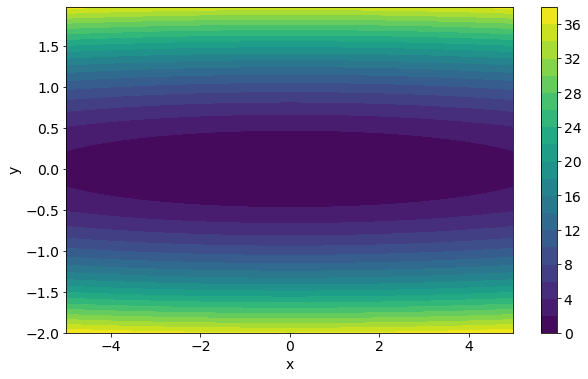

In [5]:
x = np.arange(-5.0, 5.0, 0.02)
y = np.arange(-2.0, 2.0, 0.02)
X, Y = np.meshgrid(x, y)

fZ = myfun([X,Y])

plt.figure(1,figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.contourf(X,Y,fZ,levels=20)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Carry out the simple gradient descent strategy by using only the sign of the gradient. Carry out 200 iterations (without using a stopping criterion). The values of epsilon and the starting point are specified

In [6]:
epsilon = 0.1
start = np.array([-4.0,-1.0])

points = []
while len(points) < 200:
    points.append( (start,myfun(start)) )
    start = start - np.array([epsilon*gradient(start)[0], epsilon*gradient(start)[1]])

Plot the trajectory and the value of the function (right subplot). Note that the minimum of this function is achieved for (0,0) and is 0

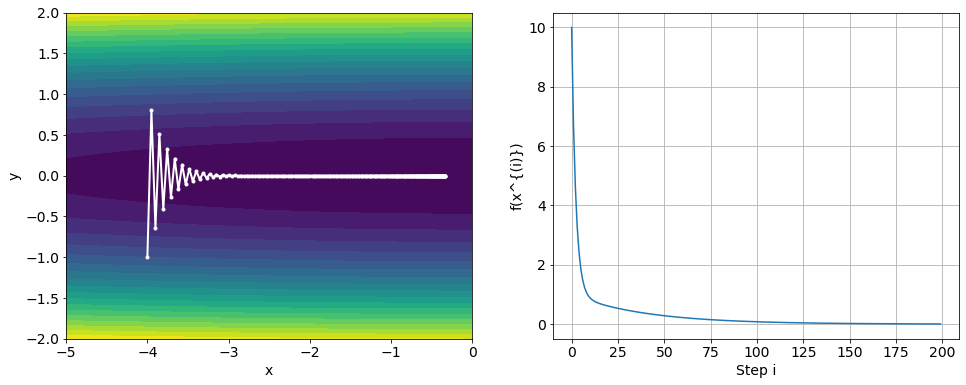

In [7]:
trajectory_x = [points[i][0][0] for i in range(len(points))]
trajectory_y = [points[i][0][1] for i in range(len(points))]

plt.figure(1,figsize=(16,6))
plt.subplot(121)
plt.rcParams.update({'font.size': 14})
plt.contourf(X,Y,fZ,levels=20)
plt.xlim(-5,0)
plt.ylim(-2,2)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(trajectory_x, trajectory_y,marker='.',color='w',linewidth=2)

plt.subplot(122)
plt.plot(range(0,len(points)),list(zip(*points))[1])
plt.grid(True)
plt.xlabel("Step i")
plt.ylabel("f(x^{(i)})")
plt.show()

This is an interactive demonstration of gradient descent, where you can specify yourself the starting point as well as the step value. You can see that depending on the step size, the minimization can get unstable

In [19]:
def plot_function(epsilon, start_x, start_y):
    start = np.array([start_x,start_y])
    points = []
    while len(points) < 200:
        points.append( (start,myfun(start)) )
        start = start - np.array([epsilon*gradient(start)[0], epsilon*gradient(start)[1]])
    
    
    trajectory_x = [points[i][0][0] for i in range(len(points))]
    trajectory_y = [points[i][0][1] for i in range(len(points))]

    plt.figure(3,figsize=(15,5))
    plt.subplot(121)
    plt.rcParams.update({'font.size': 14})
    plt.contourf(X,Y,fZ,levels=20)
    plt.xlim(-5,0)
    plt.ylim(-2,2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(trajectory_x, trajectory_y,marker='.',color='w',linewidth=2)

    plt.subplot(122)
    plt.plot(range(0,len(points)),list(zip(*points))[1])
    plt.grid(True)
    plt.xlabel("Step i")
    plt.ylabel("f(x^{(i)})")
    plt.show()

In [20]:
epsilon_values = np.arange(0.0,0.12,0.0002)
interactive_update = interactive(plot_function, \
                               epsilon = widgets.SelectionSlider(options=[("%g"%i,i) for i in epsilon_values], value=epsilon_values[0], continuous_update=False,description='epsilon',layout=widgets.Layout(width='50%')),                               
                               start_x = widgets.FloatSlider(min=-5.0,max=0.0,step=0.001,value=-4.0, continuous_update=False, description='x'), \
                               start_y = widgets.FloatSlider(min=-1.0, max=1.0, step=0.001, value=-1.0, continuous_update=False, description='y'))

output = interactive_update.children[-1]
output.layout.height = '370px'
interactive_update

interactive(children=(SelectionSlider(continuous_update=False, description='epsilon', layout=Layout(width='50%…

Next, we consider the so-called Rosenbrock function, which is given by
\begin{equation*}
f(\boldsymbol{x}) = (1-x_1)^2 + 100(x_2-x_1^2)^2
\end{equation*}
Its gradient is given by
\begin{equation*}
\nabla f(\boldsymbol{x}) = \begin{pmatrix} -2(1-x_1)-400(x_2-x_1^2)x_1 \\ 200(x_2-x_1^2)\end{pmatrix}
\end{equation*}
The Rosenbrock function has a global minimum at (1,1) but is difficult to optimize due to its curved valley. For details, see <url>https://en.wikipedia.org/wiki/Rosenbrock_function</url>

In [17]:
# Rosenbrock function
def rosenbrock_fun(x):
    return (1-x[0])**2+100*((x[1]-(x[0])**2)**2)

if autograd_available:
    rosenbrock_gradient = grad(rosenbrock_fun)
else:
    def rosenbrock_gradient(x):
        grad = [-2*(1-x[0])-400*(x[1]-x[0]**2)*x[0], 200*(x[1]-x[0]**2)]
        return grad

    
xr = np.arange(-1.6, 1.6, 0.01)
yr = np.arange(-1.0, 3.0, 0.01)
Xr, Yr = np.meshgrid(xr, yr)
fZr = rosenbrock_fun([Xr,Yr])

def plot_function_rosenbrock(epsilon, start_x, start_y):
    start = np.array([start_x,start_y])
    points = []
    while len(points) < 1000:
        points.append( (start,rosenbrock_fun(start)) )
        rgradient = rosenbrock_gradient(start)
        start = start - np.array([epsilon*rgradient[0], epsilon*rgradient[1]])
    
    
    trajectory_x = [points[i][0][0] for i in range(len(points))]
    trajectory_y = [points[i][0][1] for i in range(len(points))]

    plt.figure(4,figsize=(15,5))
    plt.subplot(121)
    plt.rcParams.update({'font.size': 14})
    plt.contourf(Xr,Yr,fZr,levels=20)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(trajectory_x, trajectory_y,marker='.',color='w',linewidth=2)

    plt.subplot(122)
    plt.plot(range(0,len(points)),list(zip(*points))[1])
    plt.grid(True)
    plt.xlabel("Step i")
    plt.ylabel("f(x^{(i)})")
    plt.show()

In [18]:
epsilon_values = np.arange(0.0,0.007,0.00002)
interactive_update = interactive(plot_function_rosenbrock, \
                               epsilon = widgets.SelectionSlider(options=[("%g"%i,i) for i in epsilon_values], value=epsilon_values[0], continuous_update=False,description='epsilon',layout=widgets.Layout(width='50%')), \
                               start_x = widgets.FloatSlider(min=-1.0,max=2.0,step=0.0001,value=0.6, continuous_update=False, description='x'), \
                               start_y = widgets.FloatSlider(min=-1.0, max=2.0, step=0.0001, value=0.1, continuous_update=False, description='y'))

output = interactive_update.children[-1]
output.layout.height = '350px'
interactive_update

interactive(children=(SelectionSlider(continuous_update=False, description='epsilon', layout=Layout(width='50%…